# Data Visualization of used Audi cars with Pie Chart and Barplot 

In [2]:
#importing libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
#reading the csv file as a pandas dataframe variable
df = pd.read_csv("audi.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


Here we can see, in this dataset there are three object type data or categorical data, model, transmission and fuelType. So, these three categorical data are suitable for making visualization with pie charts or bar chart. 

In [5]:
print(df["model"].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']


But the model data type has too many types to be represented by a pie or bar chart

In [6]:
print(df["transmission"].unique())

['Manual' 'Automatic' 'Semi-Auto']


In [7]:
print(df["fuelType"].unique())

['Petrol' 'Diesel' 'Hybrid']


As we can see, transmission and fuelType both have three unique values. We know that pie charts are better to show two to three values. But let us do both pie chart and bar plot and then we will decide which type of data visualization is better.

First, let us show the transmission values using pie chart: 

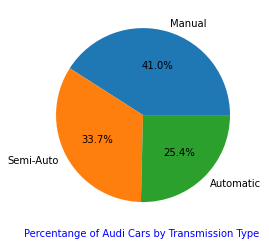

In [8]:
df["transmission"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=0) 

plt.xlabel("Percentange of Audi Cars by Transmission Type ").set_color('blue')
plt.ylabel("")
plt.show()

Now, let us see bar plot for the same values. But for that we need to create a separate dataframe from series for only transmission as we need to find the percentage of the cars first to create barplot. 

In [9]:
#converting data series to a data frame for future manipulation use 
df_transmission = pd.DataFrame(df["transmission"].value_counts())

#resetting and renaming index to show the dataframe properly 
df_transmission= df_transmission.reset_index()
df_transmission = df_transmission.rename(columns={"index":"transmission",
                                          "transmission":"no_of_cars"})

#finding the percentage of the cars
df_transmission["% of cars"] = (df_transmission["no_of_cars"]/df.shape[0])*100

#rounding the floating point values to ine digit
df_transmission = df_transmission.round(1)
display(df_transmission)


,transmission,no_of_cars,% of cars
0,Manual,4369,41.0
1,Semi-Auto,3591,33.7
2,Automatic,2708,25.4


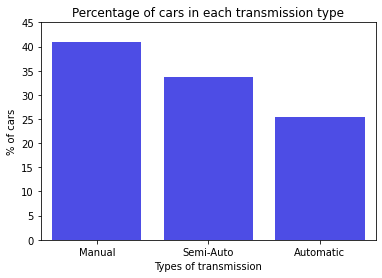

In [10]:
sns.barplot(x="transmission", 
            y="% of cars", 
            data=df_transmission, 
            color="blue",
            alpha=0.8)

plt.xlabel("Types of transmission")
plt.ylabel("% of cars")
plt.title("Percentage of cars in each transmission type")
plt.yticks(np.arange(0,46,5))

plt.show()

From my point of view, for transmission type it is better to use barplot than pie chart. Becasue from pie chart it is not easy to see the difference between the three values as they are close. For example, in the above pie chart the area of manual and semi-auto seems kind of same. 

Now, let us also see the pie chart and barplot for fuel type. 

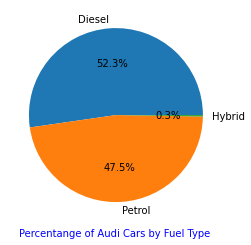

In [11]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=0)

plt.xlabel("Percentange of Audi Cars by Fuel Type ").set_color('blue')
plt.ylabel("")
plt.show()

In [12]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType= df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})
df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(1)
display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Diesel,5577,52.3
1,Petrol,5063,47.5
2,Hybrid,28,0.3


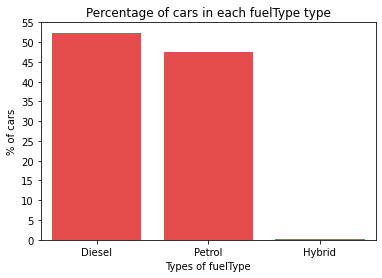

In [13]:
sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="red",
            alpha=0.8)

plt.xlabel("Types of fuelType")
plt.ylabel("% of cars")
plt.title("Percentage of cars in each fuelType type")
plt.yticks(np.arange(0,56,5))

plt.show()

I think in the case of fuelType pie chart and barplot both are suitable. Because only two values are dominant and it is clear which value is bigger. 